## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras
from keras import optimizers
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [8]:
"""
Compile 模型
"""
opt=optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.1067 - accuracy: 0.2430 - val_loss: 1.9560 - val_accuracy: 0.3022
Epoch 2/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.8935 - accuracy: 0.3348 - val_loss: 1.8483 - val_accuracy: 0.3507
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8139 - accuracy: 0.3639 - val_loss: 1.7957 - val_accuracy: 0.3717
Epoch 4/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.7632 - accuracy: 0.3832 - val_loss: 1.7477 - val_accuracy: 0.3904
Epoch 5/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.7236 - accuracy: 0.3971 - val_loss: 1.7101 - val_accuracy: 0.4054
Epoch 6/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.6898 - accuracy: 0.4086 - val_loss: 1.6783 - val_accuracy: 0.4136
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0943 - accuracy: 0.6183 - val_loss: 1.3782 - val_accuracy: 0.5176
Epoch 57/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0865 - accuracy: 0.6191 - val_loss: 1.3801 - val_accuracy: 0.5179
Epoch 58/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0800 - accuracy: 0.6227 - val_loss: 1.3655 - val_accuracy: 0.5154
Epoch 59/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0699 - accuracy: 0.6256 - val_loss: 1.4002 - val_accuracy: 0.5092
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0614 - accuracy: 0.6295 - val_loss: 1.3328 - val_accuracy: 0.5321
Epoch 61/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0561 - accuracy: 0.6287 - val_loss: 1.3394 - val_accuracy: 0.5293
Epoch 62/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0495 - accuracy: 0.6351

Epoch 111/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7065 - accuracy: 0.7562 - val_loss: 1.5145 - val_accuracy: 0.5168
Epoch 112/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7030 - accuracy: 0.7578 - val_loss: 1.5459 - val_accuracy: 0.5163
Epoch 113/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.7032 - accuracy: 0.7577 - val_loss: 1.5175 - val_accuracy: 0.5240
Epoch 114/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.6872 - accuracy: 0.7642 - val_loss: 1.4700 - val_accuracy: 0.5306
Epoch 115/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6850 - accuracy: 0.7628 - val_loss: 1.8350 - val_accuracy: 0.4810
Epoch 116/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.6782 - accuracy: 0.7662 - val_loss: 1.7551 - val_accuracy: 0.4943
Epoch 117/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.6719 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.3974 - accuracy: 0.8691 - val_loss: 1.9907 - val_accuracy: 0.5049
Epoch 166/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.3871 - accuracy: 0.8745 - val_loss: 1.9170 - val_accuracy: 0.5114
Epoch 167/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.3929 - accuracy: 0.8723 - val_loss: 2.0702 - val_accuracy: 0.4988
Epoch 168/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.3809 - accuracy: 0.8755 - val_loss: 2.6840 - val_accuracy: 0.4256
Epoch 169/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.4029 - accuracy: 0.8686 - val_loss: 2.0576 - val_accuracy: 0.4976
Epoch 170/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.3749 - accuracy: 0.8785 - val_loss: 1.9486 - val_accuracy: 0.5156
Epoch 171/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.3592 - accuracy: 0.8847 - val_

50000/50000 [==============================] - 2s 44us/step - loss: 0.1973 - accuracy: 0.9435 - val_loss: 2.4155 - val_accuracy: 0.5079
Epoch 220/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2177 - accuracy: 0.9335 - val_loss: 2.3597 - val_accuracy: 0.5066
Epoch 221/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2013 - accuracy: 0.9414 - val_loss: 2.3571 - val_accuracy: 0.5210
Epoch 222/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1842 - accuracy: 0.9477 - val_loss: 2.3390 - val_accuracy: 0.5202
Epoch 223/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1809 - accuracy: 0.9493 - val_loss: 2.4847 - val_accuracy: 0.5113
Epoch 224/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1829 - accuracy: 0.9498 - val_loss: 2.4618 - val_accuracy: 0.5108
Epoch 225/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.3247 - accuracy: 0.9100 - val_

Epoch 274/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0645 - accuracy: 0.9894 - val_loss: 2.8316 - val_accuracy: 0.5173
Epoch 275/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0618 - accuracy: 0.9904 - val_loss: 2.7847 - val_accuracy: 0.5244
Epoch 276/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0598 - accuracy: 0.9907 - val_loss: 2.7885 - val_accuracy: 0.5236
Epoch 277/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0563 - accuracy: 0.9916 - val_loss: 2.8100 - val_accuracy: 0.5242
Epoch 278/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0548 - accuracy: 0.9919 - val_loss: 3.0839 - val_accuracy: 0.5028
Epoch 279/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0657 - accuracy: 0.9875 - val_loss: 2.8156 - val_accuracy: 0.5228
Epoch 280/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3050 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.0176 - accuracy: 0.9991 - val_loss: 3.2084 - val_accuracy: 0.5269
Epoch 329/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0174 - accuracy: 0.9992 - val_loss: 3.2038 - val_accuracy: 0.5275
Epoch 330/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0172 - accuracy: 0.9992 - val_loss: 3.2187 - val_accuracy: 0.5272
Epoch 331/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0163 - accuracy: 0.9993 - val_loss: 3.2247 - val_accuracy: 0.5254
Epoch 332/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0160 - accuracy: 0.9992 - val_loss: 3.2529 - val_accuracy: 0.5238
Epoch 333/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0159 - accuracy: 0.9994 - val_loss: 3.2697 - val_accuracy: 0.5238
Epoch 334/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0160 - accuracy: 0.9993 - val_

Epoch 383/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0132 - accuracy: 0.9998 - val_loss: 3.4167 - val_accuracy: 0.5237
Epoch 384/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0130 - accuracy: 0.9998 - val_loss: 3.4240 - val_accuracy: 0.5213
Epoch 385/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0128 - accuracy: 0.9996 - val_loss: 3.4304 - val_accuracy: 0.5194
Epoch 386/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0128 - accuracy: 0.9997 - val_loss: 3.4608 - val_accuracy: 0.5178
Epoch 387/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0123 - accuracy: 0.9998 - val_loss: 3.5121 - val_accuracy: 0.5133
Epoch 388/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0129 - accuracy: 0.9996 - val_loss: 3.4476 - val_accuracy: 0.5238
Epoch 389/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0122 - accuracy:

50000/50000 [==============================] - 2s 44us/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 3.7314 - val_accuracy: 0.5236
Epoch 438/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.7353 - val_accuracy: 0.5197
Epoch 439/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.7334 - val_accuracy: 0.5214
Epoch 440/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.7347 - val_accuracy: 0.5214
Epoch 441/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.7539 - val_accuracy: 0.5170
Epoch 442/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.7566 - val_accuracy: 0.5218
Epoch 443/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0060 - accuracy: 1.0000 - val_

Epoch 492/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.9417 - val_accuracy: 0.5211
Epoch 493/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.9417 - val_accuracy: 0.5223
Epoch 494/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.9432 - val_accuracy: 0.5227
Epoch 495/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.9431 - val_accuracy: 0.5206
Epoch 496/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.9553 - val_accuracy: 0.5191
Epoch 497/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.9551 - val_accuracy: 0.5199
Epoch 498/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0039 - accuracy:

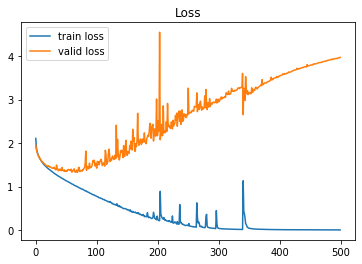

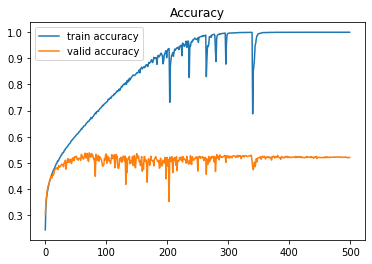

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()